**Data Pre-Processing in Excel**

1.   In the excel sheet we made 5 columns named DATE, Day, Time, Data, DATE_EXTRACTED, TIME_SPAN_HOUR.
3.   In TIME_SPAN_HOUR we extracted hour from Time. 
4.   We extracted only the date in the column DATE_EXTRACTED dicarding the month and year.
2.   Extracted data from Chat Volume excel sheet and copied that data to Hourly_dataset_chats.xlsx corresponding to respective Date and Time.

In [ ]:
#importing pandas and numpy
import pandas as pd
import numpy as np

**1. Uploading Excel sheets**

In [ ]:
from google.colab import files
chat_data_hourly=files.upload()

Saving Hourly_dataset_chats.xlsx to Hourly_dataset_chats.xlsx


**2. Reading files with Pandas**

In [ ]:
import io
df=pd.read_excel(io.BytesIO(chat_data_hourly['Hourly_dataset_chats.xlsx']))
df

,DATE,Day,Time,Data,DATE_EXTRACTED,TIME_SPAN_HOUR
0,2021-02-01,Monday,06:30:00,12,1,6
1,2021-02-01,Monday,07:30:00,4,1,7
2,2021-02-01,Monday,08:30:00,15,1,8
3,2021-02-01,Monday,09:30:00,17,1,9
4,2021-02-01,Monday,10:30:00,36,1,10
...,...,...,...,...,...,...
1411,2021-03-31,Wednesday,1900-01-01 01:30:00,20,31,1
1412,2021-03-31,Wednesday,1900-01-01 02:30:00,19,31,2
1413,2021-03-31,Wednesday,1900-01-01 03:30:00,8,31,3
1414,2021-03-31,Wednesday,1900-01-01 04:30:00,7,31,4


##dropping **DATE and Time** column from datasheet

In [ ]:
df.drop(['DATE', 'Time'], axis=1, inplace=True)

In [ ]:
df

,Day,Data,DATE_EXTRACTED,TIME_SPAN_HOUR
0,Monday,12,1,6
1,Monday,4,1,7
2,Monday,15,1,8
3,Monday,17,1,9
4,Monday,36,1,10
...,...,...,...,...
1411,Wednesday,20,31,1
1412,Wednesday,19,31,2
1413,Wednesday,8,31,3
1414,Wednesday,7,31,4


##marking **weekends as 1 and weekdays as 0**

In [ ]:
df['Weekend'] = np.where(((df['Day'] == 'Saturday') | (df['Day'] == 'Sunday')), 1, 0)

In [ ]:
df

,Day,Data,DATE_EXTRACTED,TIME_SPAN_HOUR,Weekend
0,Monday,12,1,6,0
1,Monday,4,1,7,0
2,Monday,15,1,8,0
3,Monday,17,1,9,0
4,Monday,36,1,10,0
...,...,...,...,...,...
1411,Wednesday,20,31,1,0
1412,Wednesday,19,31,2,0
1413,Wednesday,8,31,3,0
1414,Wednesday,7,31,4,0


##dropping **Day** column from datasheet

as it is of no use now

In [ ]:
df.drop(['Day'], axis=1, inplace=True)

In [ ]:
df

,Data,DATE_EXTRACTED,TIME_SPAN_HOUR,Weekend
0,12,1,6,0
1,4,1,7,0
2,15,1,8,0
3,17,1,9,0
4,36,1,10,0
...,...,...,...,...
1411,20,31,1,0
1412,19,31,2,0
1413,8,31,3,0
1414,7,31,4,0


Now we should **analyse our dataset**.

We will import **seaborn library to plot a boxplot** which will describe to us about outliers.

Checking for the **Outliers is important** step which will help us in deciding best **evaluation metrics**.

If there are outliers **MAE is the best metric to evaluate errors**.

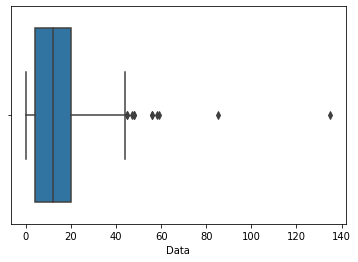

In [ ]:
import seaborn as sns
sns.boxplot(x = df["Data"])

We will split our dataset in 3 parts-

1.   Train 70%
2.   Test 15%
1.   Live/Validation 15%

We will create validation set for only large datasets.

In [ ]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(df.drop('Data',axis = 1),df['Data'],test_size = 0.3,random_state = 1)
X_test, X_live , y_test , y_live = tts(X_test,y_test,test_size = 0.5,random_state = 1)

Here we are importing Evaluation Metrics from sklearn library.

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

**3. Applying RANDOM FOREST REGRESSION on the data**

We will use **Random Forest Regressor** as our model to predict the data(number of calls per hour).

Also, we will measure our performance using R2 score and will measuring Error by various methods such as Mean_Squared_Error , Root_Mean_Squared_Error, Mean_Absolute_Error.

Because our data has **Outlier**, **Mean Absolute Error will be the best metric** to evaluate our result.

In [ ]:
from sklearn.ensemble import RandomForestRegressor


rfr = RandomForestRegressor(n_estimators= 200 , max_depth=9 , n_jobs=-1 , random_state= 1)
# FIT THE DATA using FIT METHOD
# Calculate the R2_score, mse, mae for training data as well as testing data.

rfr.fit(X_train , y_train)

import numpy as np
mae_train = mean_absolute_error((y_train) ,(rfr.predict(X_train)))
mae_test = mean_absolute_error((y_test) , (rfr.predict(X_test)))
mse_train = mean_squared_error((y_train) ,(rfr.predict(X_train)))
mse_test = mean_squared_error((y_test) , (rfr.predict(X_test)))
rmse_train = np.sqrt(mean_squared_error((y_train) ,(rfr.predict(X_train))))
rmse_test = np.sqrt(mean_squared_error((y_test) , (rfr.predict(X_test))))
R_score_train = r2_score((y_train) , (rfr.predict(X_train)))
R_score_test = r2_score((y_test) , (rfr.predict(X_test)))

mae_live = mean_absolute_error((y_live) ,(rfr.predict(X_live)))
mse_live = mean_squared_error((y_live) ,(rfr.predict(X_live)))
rmse_live = np.sqrt(mean_squared_error((y_live) ,(rfr.predict(X_live))))
R_score_live = r2_score((y_live) , (rfr.predict(X_live)))

print("ACCURACY : ")
print("Because our dataset has outliers Mean Absolute Error is best method")
print("Mean Absolute Error Training Set")
print(mae_train)
print("Mean Absolute Error Test Set")
print(mae_test)
print("Mean Absolute Error Live Set")
print(mae_live)
print("")
print("Higher the value greater the accuracy")
print("R2 Score Training Set")
print(R_score_train)
print("R2 Score Test Set")
print(R_score_test)
print("R2 Score Live Set")
print(R_score_live)

print("")
print("")
print("")
print("Root Mean Squared Error Training Set")
print(rmse_train)
print("Root Mean Squared Error Test Set")
print(rmse_test)
print("Root Mean Squared Error Live Set")
print(rmse_live)
print("Mean Squared Error Training Set")
print(mse_train)
print("Mean Squared Error Test Set")
print(mse_test)
print("Mean Squared Error Live Set")
print(mse_live)

ACCURACY : 
Because our dataset has outliers Mean Absolute Error is best method
Mean Absolute Error Training Set
3.1658502945371505
Mean Absolute Error Test Set
3.9929054440222678
Mean Absolute Error Live Set
4.0893519202014295

Higher the value greater the accuracy
R2 Score Training Set
0.7694327551830195
R2 Score Test Set
0.6869754600492559
R2 Score Live Set
0.6230079297630526



Root Mean Squared Error Training Set
5.330638230443565
Root Mean Squared Error Test Set
5.6893592568017874
Root Mean Squared Error Live Set
5.664010262482577
Mean Squared Error Training Set
28.415703943866507
Mean Squared Error Test Set
32.368808752956184
Mean Squared Error Live Set
32.08101225350795


#Calculating Number of Engineers required

In [ ]:
data = [[15 , 17 , 0]]

Predicting for **Date = 15 , Time = 5:30 PM , WeekDay**(no weekend)

In [ ]:
rfr.predict(data)

array([16.11744694])

###Further Processing

The model predicts the number of chats.

Average Handling Time of chat is given 23 minutes.

Engineers works for 7 hours 30 minutes (= 450 minutes) per day.

Engineers works for 7 hours 30 minutes (= 450 minutes) per day. 

So, they will work for 18.75 minutes(= 450 minutes / 24 hours) per hour.

The number of minutes workers are required per hour = the number of chat * Average Handling Time of chat

Thus, the number of resourses required = (The number of minutes workers are required) / (Number of minutes each workers works per hour)

In [ ]:
number_of_chats=16.11744694
number_of_resourses_required=(number_of_chats)*23/18.75
number_of_resourses_required

19.77073491306667

# *20 Engineers required on 15th April , 5:30 PM with weekday.*
